# National Park Service API in Python

by Nathaniel Pedigo

**National Park Service documentation:** [https://www.nps.gov/subjects/developer/api-documentation.htm](https://www.nps.gov/subjects/developer/api-documentation.htm)

**National Park Service terms of use and disclaimer:** [https://www.nps.gov/aboutus/disclaimer.htm](https://www.nps.gov/aboutus/disclaimer.htm)

This API is managed by the National Park Service (NPS) of the United States of America. It contains pertinent information about the national parks, monuments, and other sites managed by the NPS. This API is free to use with an API key.

*These recipe examples were tested on October 11, 2024.*

**_NOTE:_** The National Park Service API limits requests to a maximum of 1000 requests per hour: https://www.nps.gov/subjects/developer/guides.htm

## Setup

### API Key

An API key is required to access the National Park Service API. Sign up can be found here: [https://www.nps.gov/subjects/developer/get-started.htm](https://www.nps.gov/subjects/developer/get-started.htm).

Add your API key below:

In [2]:
key = ""

Alternatively, you can save the above data in a separate python file and import it:

In [3]:
from api_key import key

### Import Libraries

First step is to import the necessary libraries. We will be using the `requests` library to make the API calls, the `matplotlib` library to create data visualizations, and the 'numpy' library to assist in the creation of the data visualizations. If you are more familiar with Python and would prefer a different method of data visualization, feel free to use that instead. Additionally, as the API returns data in JSON format, we will be using the `json` library to parse the data.

In [4]:
import requests
import matplotlib.pyplot as plt
from time import sleep
from pprint import pprint

## 1. Find the Number of NPS Lands in a State

Count the number of National Park Service managed lands in Alabama.

Once we have specified the headers, we can begin to specify the parameters of the API call. The NPS API allows for a number of parameters to be specified, including the state, the type of site, and the number of results returned. For this example, we will be using the state of Alabama, the type of site as national parks, and the maximum number of results returned as 200. 

In [5]:
state = "AL"
limit = 200

query = f"parks?stateCode={state}&limit={limit}"
endpoint = f"https://developer.nps.gov/api/v1/{query}&api_key={key}" 

Next, we use `requests.get()` to make the API call:

In [6]:
response = requests.get(endpoint)

First, we must check that the request was performed successfully. The `status_code` field of the response can give us insight into any errors that may occur. The request returns a JSON object, which we can parse using the `json()` function. This function returns a dictionary, which we can then use to access the data we need.

In [7]:
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Print the first level of the JSON response
    pprint(data, depth=1)
else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code}, {response.text}")

{'data': [...], 'limit': '200', 'start': '0', 'total': '11'}


From the response above, we can see that the total number of returned data items is 11, as indicated by `data["total"]`. To confirm, we can check the length of `data["data"]`, which holds the data for each returned NPS managed land:

In [8]:
len(data["data"])

11

Finally, we can print our result:

In [9]:
print(f"The number of NPS managed lands in {state} is {data["total"]}.")

The number of NPS managed lands in AL is 11.


## 2. Finding the Number of NPS Owned Parking Lots by State

In this example, we look at the number of NPS-owned parking lots by state using the `parkinglots` endpoint:

In [10]:
# URL for Alabama
url = f"https://developer.nps.gov/api/v1/parkinglots?stateCode=AL&limit=200&api_key={key}"
response = requests.get(endpoint)

pprint(response.json(), depth=1)

{'data': [...], 'limit': '200', 'start': '0', 'total': '11'}


Next, we'll loop through each state to find the total number of parking lots for each:

In [11]:
# Create a list of all state abbreviations in the United States
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

# Create an empty dictionary to store the total number of parking lots per state
parking_lots = {}

for state in states:

    endpoint = f"https://developer.nps.gov/api/v1/parkinglots?stateCode={state}&limit=200&api_key={key}"
    response = requests.get(endpoint)

    # Extract the total number of national parks in the state
    total = int(response.json()["total"])

    # Add the total to the parking_lots list
    parking_lots[state] = total

    # Delay for some period between between API calls
    sleep(0.75)

In [12]:
# Create a list of the top 5 states with the most parking lots using stateDict sorted on values
stateDictSorted = sorted(parking_lots.items(), key=lambda item: item[1], reverse=True)

In [13]:
print("Top 5 States by NPS Parking Lots:")
for state in stateDictSorted[:5]:
    print(f"{state[0]}: {state[1]}")

Top 5 States by NPS Parking Lots:
CA: 59
GA: 50
AZ: 43
VA: 42
FL: 34


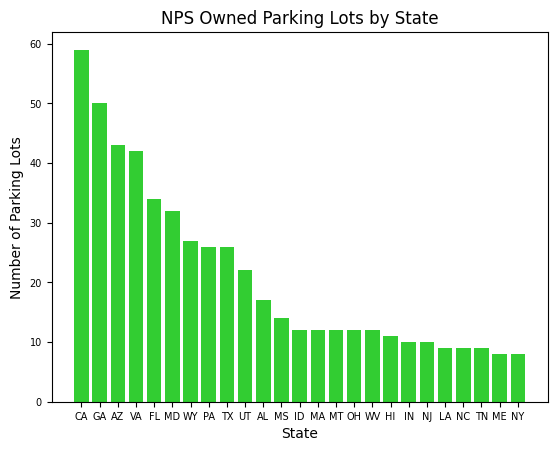

In [14]:
# Extract keys and values for plotting
states_top25 = [state[0] for state in stateDictSorted[:25]]
values_top25 = [state[1] for state in stateDictSorted[:25]]

# Create a bar chart
plt.bar(states_top25, values_top25, color='limegreen')
plt.title("NPS Owned Parking Lots by State")
plt.xlabel("State")
plt.ylabel("Number of Parking Lots")
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

## 3. Finding Campground Addresses

Prompt the user for a State, then a selection of the National Park Service managed lands in that state, and return the addresses of all campgrounds in the park.

In [17]:
state = ""

# Prompt user for a state code using the states list from Section 2
while state not in states:
    state = input("Enter a valid state code: ")

# Perform the API call
endpoint = f"https://developer.nps.gov/api/v1/parks?stateCode={state}&limit=150&api_key={key}"
response = requests.get(endpoint)

# Offer user a selection from available parks within specified state
if response.status_code == 200:

    parks = response.json()["data"]
    park_names = [park["name"] for park in parks]
    park_codes = [park["parkCode"] for park in parks]

    print(f"Available NPS managed lands in {state}:")
    for i, park_name in enumerate(park_names):
        print(f"{i+1}. {park_name}")

Available NPS managed lands in WY:
1. Bighorn Canyon
2. California
3. Devils Tower
4. Fort Laramie
5. Fossil Butte
6. Grand Teton
7. Mormon Pioneer
8. Oregon
9. Pony Express
10. Yellowstone


In [18]:
# Prompt to pick a park
park_choice = 0
while (park_choice < 1) or (park_choice > len(park_names)):
    park_choice = int(input(f"Enter the number of the National Park Service managed land you would like to explore (1-{len(park_names)}): "))

# Get the park code for the selected park
park_code = park_codes[park_choice-1]
park_name = park_names[park_choice-1]

# Create the endpoint URL with the park code
endpoint = f"https://developer.nps.gov/api/v1/campgrounds?parkCode={park_code}&api_key={key}"

# Perform the API call
response = requests.get(endpoint)

# Extract the total number of campgrounds in the park
if response.status_code == 200:
    data = response.json()
    
    campgrounds = data["data"]
    total = data["total"]

    print(f"There are {total} campgrounds in {park_name}.")

    # Print the names and addresses of the campgrounds
    if int(total) > 0:
        for campground in campgrounds:
            print(f"\nName: {campground['name']}")
            
            for address in campground["addresses"]:
                if address["type"] == "Physical":
                    print(f"Address: {address['line1']} {address['city']}, {address['stateCode']} {address['postalCode']}")

There are 12 campgrounds in Yellowstone.

Name: Bridge Bay Campground
Address: GPS Coordinates: N 44 32.070 W 110 26.218 Yellowstone National Park, WY 82190

Name: Canyon Campground
Address: GPS Coordinates: N 44 44.118 W110 29 17 Yellowstone National Park, WY 82190

Name: Fishing Bridge RV Park
Address: GPS Coordinates: N 44 33.820 W 110 22.167 Yellowstone National Park, WY 82190

Name: Grant Village Campground
Address: GPS Coordinates-- N 44 23.610 W 110 33.769 Yellowstone National Park, WY 82190

Name: Indian Creek Campground
Address: GPS Coordinates--N: 44  53.22138 W: 110 44.16414 Yellowstone National Park, WY 82190

Name: Lewis Lake Campground
Address: GPS Coordinates-- N 44.2822056, W -110.6279873 Yellowstone National Park, WY 82190

Name: Madison Campground
Address: N 44 38.725 W 110 51.687 Yellowstone National Park, WY 82190

Name: Mammoth Campground
Address: GPS Coordinates N 44 58.4166 W 110.41.59392 Yellowstone National Park, WY 82190

Name: Norris Campground
Address: GPS C

## 4. Finding Locations with Cellular Service within a Park

Prompt the user for a State, then a selection of the National Park Service managed lands in that state, and return the names of all locations in the park that are listed as having cellular service as an amenity.

In [19]:
state = ""

# Prompt user for a state code
while state not in states:
    state = input("Enter a valid state code: ")

# Create the endpoint URL with the state code
endpoint = f"https://developer.nps.gov/api/v1/parks?stateCode={state}&limit=50&api_key={key}"

# Perform the API call
response = requests.get(endpoint)

# Offer user a selection from available parks within specified state
if response.status_code == 200:
    data = response.json()
    parks = data["data"]
    park_names = [park["name"] for park in parks]
    park_codes = [park["parkCode"] for park in parks]
    print("Available NPS managed lands in the specified state:")
    for i, park_name in enumerate(park_names):
        print(f"{i+1}. {park_name}")

Available NPS managed lands in the specified state:
1. Butterfield Overland
2. California
3. Gateway Arch
4. George Washington Carver
5. Harry S Truman
6. Lewis & Clark
7. Oregon
8. Ozark
9. Pony Express
10. Santa Fe
11. Ste. Geneviève
12. Trail Of Tears
13. Ulysses S Grant
14. Wilson's Creek


In [20]:
# Prompt to pick a park
park_choice = 0
while (park_choice < 1) or (park_choice > len(park_names)):
    park_choice = int(input(f"Enter the number of the National Park Service managed land you would like to explore (1-{len(park_names)}): "))

# Get the park code for the selected park
park_code = park_codes[park_choice-1]
park_name = park_names[park_choice-1]

# Create the endpoint URL with the park code
endpoint = f"https://developer.nps.gov/api/v1/places?parkCode={park_code}&api_key={key}"

# Perform the API call
response = requests.get(endpoint)

# Extract all locations in the park
data = response.json()

if(data["total"] == 0):
    print(f"There are no locations in {park_name}.")
else:
    cell_locations = []

    for location in data["data"]:
        if "Cellular Signal" in location["amenities"]:
            cell_locations.append(location["title"])

    if cell_locations:
        print(f"The following locations in {park_name} have cellular service:\n")
        for location in cell_locations:
            print(location)
    else:
        print(f"There are no locations in {park_name} with cellular service.")

The following locations in Ulysses S Grant have cellular service:

Grant's Farm
Ice House and Chicken House
Stable at White Haven
Summer Kitchen
White Haven
